# ML assignment

Predicting a news's virality likelihood.

## Getting data

I have scrapped news headlines from India-Today website. <br>
There were separate 'URLs' for trending and normal news.


In [0]:
#Librariers for web-scrapping
import requests
from bs4 import BeautifulSoup

In [0]:
#Function to get news headlines from a given URL
def get_news(url, no_of_pages):
  news = []
  for i in range(no_of_pages):
    url = url + str(i)
    page = requests.get(url).text
    soup = BeautifulSoup(page)
    a_tags = soup.find_all('a')
    a_tags_text = [tag.get_text().strip() for tag in a_tags]
    sentence_list = [sentence for sentence in a_tags_text if len(sentence)>25]
    news = news + sentence_list[:12]
  return news

In [3]:
#getting trending headlines from India Today
trend_news = get_news('https://www.indiatoday.in/trending-news?page=', 15)
print(len(trend_news))
print(trend_news)

180
["Twitter has hilarious answers to Zomato's question about 2020", 'Anand Mahindra is bowled over by social distancing in Tuk Tuk', "TikTok videos: Iron Man's lookalike to Alaya F's quarantine workout", 'Sudarsan Pattnaik salutes doctors and nurses with stunning sand art on Puri beach', 'Tiruppur Police teaches lesson to lockdown violators. Viral video', "Don't step out of home: Mumbai Police warns netizens with Instagram post", 'Gay couple distributes rainbow masks to raise awareness on Covid-19', 'Watch: Leopards play by the roadside in viral video', 'Coronavirus auto hits Chennai streets to raise awareness', 'Violinist and pedicab operator spread cheer in New Orleans with their Mobile Music Box', 'Are you drunk? Internet asks Twitter after it posts a bizarre tweet', 'Elephant rescued from agricultural well in Karnataka. Watch viral video', "Banksy's Girl With A Pierced Eardrum artwork gets a face mask", 'Can you count the number of tigers in this pic? Big B makes a guess', 'Anima

In [4]:
#getting normal headlines from India Today
norm_news = get_news('https://www.indiatoday.in/india?page=', 15)
print(len(norm_news))
print(norm_news)

180
['Covid-19 cases in India cross 23,000-mark, over 700 dead', '9 CRPF personnel test positive for Covid-19 in Delhi', 'End of lockdown in sight? Centre reopens shops selling non-essential goods, hopes to bend coronavirus curve by May 3', 'Ask national carrier to roll back 10 per cent pay cut: Air India unions to aviation min', 'Odisha Covid-19 tally rises to 94 after 4 new cases, all linked to Bengal', 'India records biggest single-day spike in in Covid-19 cases', 'Assam CM Sarbananda Sonowal distributes face masks among tea garden workers', 'MHA permits registered shops to open from Saturday | Read order here', 'Ahmedabad woman, who recovered from virus, donates plasma', 'Assam tightens vigil in bordering areas after Covid-19 cases rise in West Bengal', 'TN CM requests Kejriwal to provide best possible care to Tamils who attended Tablighi Jamaat', 'Assam: 2 DNLA terrorists killed in encounter with security forces\xa0in\xa0Karbi Anglong', 'Covid-19 lockdown aftermath: Salary cuts, l

In [5]:
#getting today's headlines from India Today
#Used to predict the virality likelihood
test_news = get_news('https://www.indiatoday.in/mail-today?page=', 10)
print(len(test_news))
print(test_news)

120
['Web series actors are bingeing on', 'Concerts for fighters of Corona', "Hum Bhi Warriors: Residents come to Delhi Police's aid in fight against Covid-19", 'Coronavirus: At Delhi-Noida border, health workers facing huge problems over pass issue', 'Coronavirus pandemic: Testing times for Delhi as Covid-19 cases surge', 'Shades of reality in abstraction', 'India co-sponsors global effort against Covid-19, Pakistan objects | Exclusive', 'Coronavirus: How a crucial machine required to manage patients at ICU was fixed', 'Rise of the asymptomatic: Fresh twist in war against\xa0coronavirus', 'Coronavirus: What does 80% asymptomatic cases mean?', 'Coronavirus Tracker: Gujarat overtakes Delhi, now has 2nd highest cases after Maharashtra', 'DEEP DIVE | Coronavirus: What is community transmission?', 'Coronavirus: Delhi man recovers, vows to donate plasma', 'Coronavirus: Most patients in Maharashtra\xa0display no symptoms', 'Frontline warriors fighting myth and reality', 'Palghar lynching cas

In [0]:
#Libraries for holding data
import numpy as np
import pandas as pd

In [0]:
#First 180 headlines are trending and the next 180 were normal ones
Y_true = np.asarray([1]*180 + [0]*180)
news_df = pd.DataFrame({'news':trend_news+norm_news})
test_df = pd.DataFrame({'news':test_news})

In [8]:
news_df.head(3)

,news
0,Twitter has hilarious answers to Zomato's ques...
1,Anand Mahindra is bowled over by social distan...
2,TikTok videos: Iron Man's lookalike to Alaya F...


In [9]:
test_df.head(3)

,news
0,Web series actors are bingeing on
1,Concerts for fighters of Corona
2,Hum Bhi Warriors: Residents come to Delhi Poli...


## Preprocessing the data

These are the preprocessing which I have done : <br>
1. Changing every alphabet to lowercase - this eliminates the difference between 'The' and 'the'.
2. Removing special characters - the special characters won't contribute much to the output variable.
3. Lemmetizing each word - used to change words into its root form. Ex: Chilren->Child, this helps reducing redundant information in a sentence.

In [10]:
#Importing libraries required for preprocessing the data
import re
import nltk
nltk.download('wordnet')

from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
#Function to change every word to lowercase
def chn_lower_case(df,col):
  df[col] = df[col].str.lower()
  return df

In [0]:
#Function to remove non-alphanumericals
def remove_special_characters(df, col):
  proc_text = []
  for text in df[col]:
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', text)
    proc_text.append(text)
  df[col] = proc_text
  return df

In [0]:
#Function to lemmantize the dataframe
def lemment(df, col):
  proc_text = []

  for text in df[col]:
    text = ' '.join([wnl.lemmatize(word) for word in text.split()])
    proc_text.append(text)
  df[col] = proc_text
  return df

In [0]:
#Processing the dataframe
def process_df(df_to_process, col):
  df = chn_lower_case(df_to_process, col)
  df = remove_special_characters(df, col)
  df = lemment(df, col)
  return df

In [15]:
news_df = process_df(news_df,'news')
news_df.head(3)

,news
0,twitter ha hilarious answer to zomatos questio...
1,anand mahindra is bowled over by social distan...
2,tiktok video iron man lookalike to alaya f qua...


In [16]:
test_df = process_df(test_df,'news')
test_df.head(3)

,news
0,web series actor are bingeing on
1,concert for fighter of corona
2,hum bhi warrior resident come to delhi police ...


## Feature extraction and Modeling

I have used a TF - IDF (Term Frequency — Inverse Document Frequency) vectoriser to convert a sentence into a vector. <br>
Then used a simple logistic regression model to predict the probability of news becoming viral.

In [17]:
#Importing libraries for feature extraction and modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
#Libraries for visualization
import seaborn as sn
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
#Extracting features from the preprocessed headlines
tv = TfidfVectorizer()
X = tv.fit_transform(news_df['news'])
X_test = tv.transform(test_df['news'])
print(X.shape)
print(X_test.shape)

(360, 467)
(120, 467)


In [19]:
#spiltting the datapoints into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X,Y_true,test_size=0.3,random_state=0,stratify=Y_true)
print(X_train.shape)
print(X_val.shape)

(252, 467)
(108, 467)


In [0]:
#Fitting logistic regression model to the data
lr = LogisticRegression(max_iter=100)
lr.fit(X_train,y_train)
pred=lr.predict(X_val)

In [21]:
#Validating the model's acuuracy
print('Validation F1-score : ' + str(f1_score(pred,y_val)))
print('Validation Accuracy : ' + str(accuracy_score(pred,y_val)))

Validation F1-score : 0.9719626168224299
Validation Accuracy : 0.9722222222222222


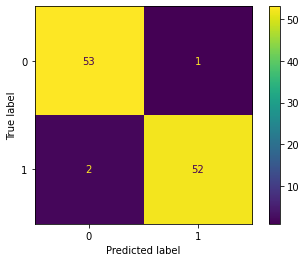

In [22]:
#Confusion matrix
plot_confusion_matrix(lr,X_val,y_val)
plt.show()

In [23]:
#Predicting likelihood for test data
y_test = lr.predict_proba(X_test)[:,1]
pred_df = pd.DataFrame({'news':test_news,'virality likelihood':y_test*100})
pred_df.to_csv('predictions.csv')
pred_df.head()

,news,virality likelihood
0,Web series actors are bingeing on,72.615316
1,Concerts for fighters of Corona,43.277068
2,Hum Bhi Warriors: Residents come to Delhi Poli...,33.994159
3,"Coronavirus: At Delhi-Noida border, health wor...",46.660668
4,Coronavirus pandemic: Testing times for Delhi ...,28.903749
